In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Класичне машинне навчання
# Навчання з учителем. Регресія
# Лінійна регресія

# напишіть функцію гіпотези лінійної регресії у векторному вигляді

# Лінійна регресія з однією змінною (h)
h(x) = w_0 + w_1 * x  #  залежність від одного параметру

In [2]:
def h(w_0: float, w_1: float, x: float) -> float:
    """
    Return the value of the linear regression hypothesis of dependence on one parameter.
    w_0, w_1: weights;
    x: parameter.
    """
    return w_0 + w_1 * x


# Лінійна регресія з багатьма змінними (h = linear_regression_hypothesis)
h(x) = w⋅x  # залежність від багатьох параметрів

In [3]:
def linear_regression_hypothesis(w: np.array, x: np.array) -> float:
    """
    Return the value of the linear regression hypothesis of dependence on many parameters.
    w: weights;
    x: parameters, where x[0] = 1.
    """
    if len(w) != len(x) or x[0] != 1:
        return None
    
    return np.dot(w, x)

# створіть функцію для обчислення функції втрат у векторному вигляді (loss_function)

In [23]:
def loss_function(w_0: float, w_1: float, df: pd.DataFrame, idx_x: int, idx_y: int) -> float:
    """Calculation of the loss function in vector form (for dependence on one parameter).
    w_0, w_1: weights;
    df: DataFrame;
    idx_x: index of column in df for parameter (x);
    idx_y: index of column in df for result-function (y).
    """
    n: int = df.shape[0]
    cost = 0
    for x, y in zip(df.iloc[:, idx_x], df.iloc[:, idx_y]):
        cost += (y - h(w_0, w_1, x)) ** 2

    return cost/(2*n)

In [ ]:
def loss_function_many(w: np.array, df: pd.DataFrame, num_x: list, idx_y: int) -> float:
    """Calculation of the loss function in vector form (for dependence on many parameters).
    w: weights;
    df: DataFrame;
    num_x: indexes list of column in df for parameters (x);
    idx_y: index of column in df for result-function (y).
    """
    if len(w) - 1 != len(num_x):
        return None
    
    n: int = len(num_x)   # idx_y = [0], num_x = [1,2,3,4,10]
    m: int = df.shape[0]
    x = pd.DataFrame()
    x[0] = np.ones((m,), dtype=int)
    for num, col in enumerate(num_x):
        x[num+1] = df.iloc[:, col]
        
    cost = 0
    for line_idx_y, y in enumerate(df.iloc[:, idx_y]):
        cost += (y - linear_regression_hypothesis(w, x.iloc[line_idx_y])) ** 2

    return cost/(2*m)

# реалізуйте один крок градієнтного спуску

In [ ]:
def grad_step_op(weights: tuple, grads: tuple, learning_rate: float = 0.001) -> tuple:
    """Function of one step of gradient descent with one parameter. Return the weights."""
    w_0, w_1 = weights
    grad_0, grad_1 = grads
    w_0 -= learning_rate * grad_0
    w_1 -= learning_rate * grad_1
    
    return w_0, w_1  # (w_0, w_1)

In [ ]:
def grad_step_many(weights: tuple, grads: tuple, learning_rate: float = 0.001) -> list:
    """Function of one step of gradient descent with many parameters. Return the weights (list)."""
    weights = list(weights)
    grads = list(grads)
    for w, g in zip():
        w -= learning_rate * g
    
    return weights

# знайдіть найкращі параметри w⃗ для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень

In [ ]:
def grad_w_0(w_0: float, w_1: float, df: pd.DataFrame, idx_x: int, idx_y: int) -> float:
    """Calculation of the graduation descent weight 0 (for dependence on one parameter).
    w_0, w_1: weights;
    df: DataFrame;
    idx_x: index of column in df for parameter (x);
    idx_y: index of column in df for result-function (y).
    """
    n: int = df.shape[0]
    cost = 0
    for x, y in zip(df.iloc[:, idx_x], df.iloc[:, idx_y]):
        cost += (h(w_0, w_1, x) - y)

    return cost/n

In [ ]:
def grad_w_1(w_0: float, w_1: float, df: pd.DataFrame, idx_x: int, idx_y: int) -> float:
    """Calculation of the graduation descent weight 1 (for dependence on one parameter).
    w_0, w_1: weights;
    df: DataFrame;
    idx_x: index of column in df for parameter (x);
    idx_y: index of column in df for result-function (y).
    """
    n: int = df.shape[0]
    cost = 0
    for x, y in zip(df.iloc[:, idx_x], df.iloc[:, idx_y]):
        cost += (h(w_0, w_1, x) - y) * x

    return cost/n

In [ ]:
def grad_descent(
                 weights: tuple, 
                 df: pd.DataFrame, 
                 num_iter: int, 
                 learning_rate: float = 0.001, 
                 epsilon: float = 0.01
                 ) -> tuple:
    """Gradient descent function with one parameter. Return weights and story of the descent."""
    w_0, w_1 = weights
    loss = loss_function(w_0, w_1, df)
    loss_history = [loss]
    for i in range(num_iter):
        d_w_0 = grad_w_0(w_0, w_1, df)
        d_w_1 = grad_w_1(w_0, w_1, df)
        grads = (d_w_0, d_w_1)
        loss = loss_function(w_0, w_1, df)
        loss_history.append(loss)
        w_0, w_1 = grad_step_op(weights, grads, learning_rate=learning_rate)
        weights = (w_0, w_1)
        loss = loss_function(w_0, w_1, df)
        loss_history.append(loss)
        if abs(loss - loss_history[-1]) < epsilon:
            break

    return weights, loss_history

In [ ]:
w_0 = 0
w_1 = np.linspace(-6000, 8000, 500)

In [ ]:
len(w_1)

In [10]:
df = pd.read_csv('Housing.csv')
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


<Axes: xlabel='area', ylabel='price'>

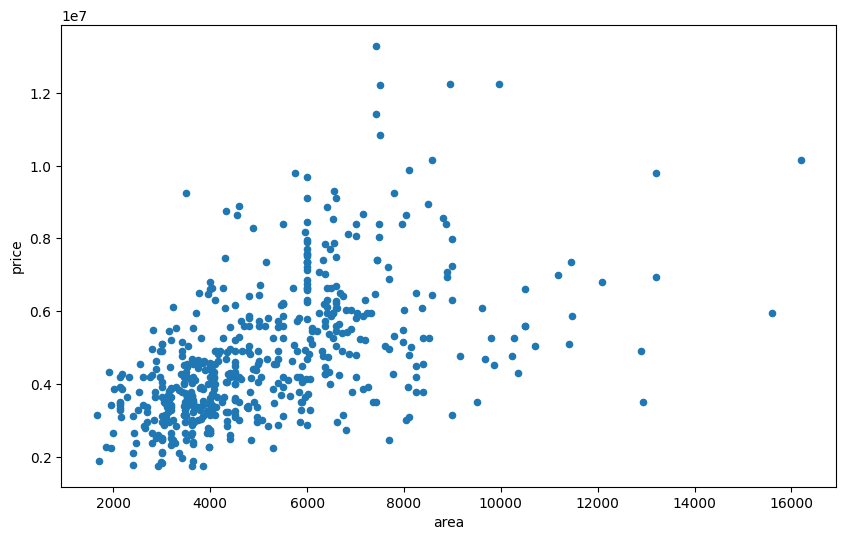

In [11]:
df.plot(x='area', y='price', kind='scatter', figsize=(10,6))

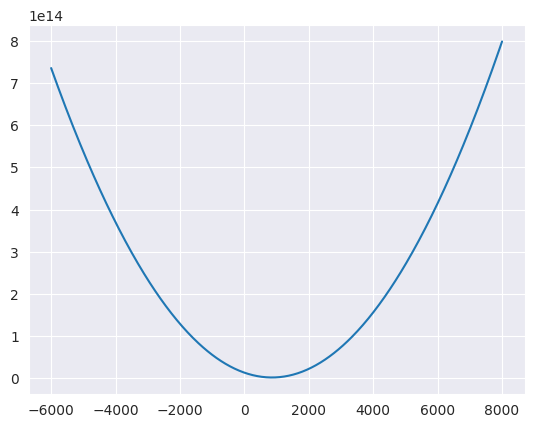

In [24]:
plt.plot(w_1, loss_function(w_0, w_1, df))

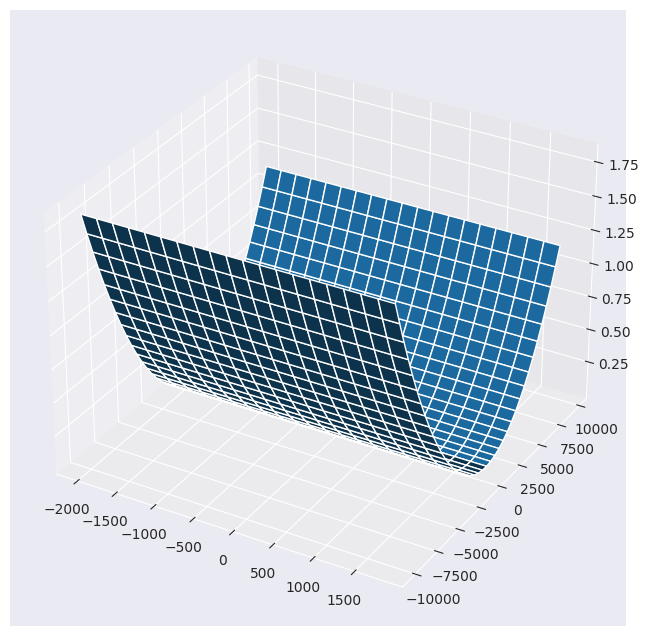

In [33]:
grid_w_0 = np.arange(-2000, 2000, 200)
grid_w_1 = np.arange(-10000, 10000, 500)
w_0, w_1 = np.meshgrid(grid_w_0, grid_w_1)
z = loss_function(w_0, w_1, df)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection= '3d')
ax.plot_surface(w_0, w_1, z)
plt.show()

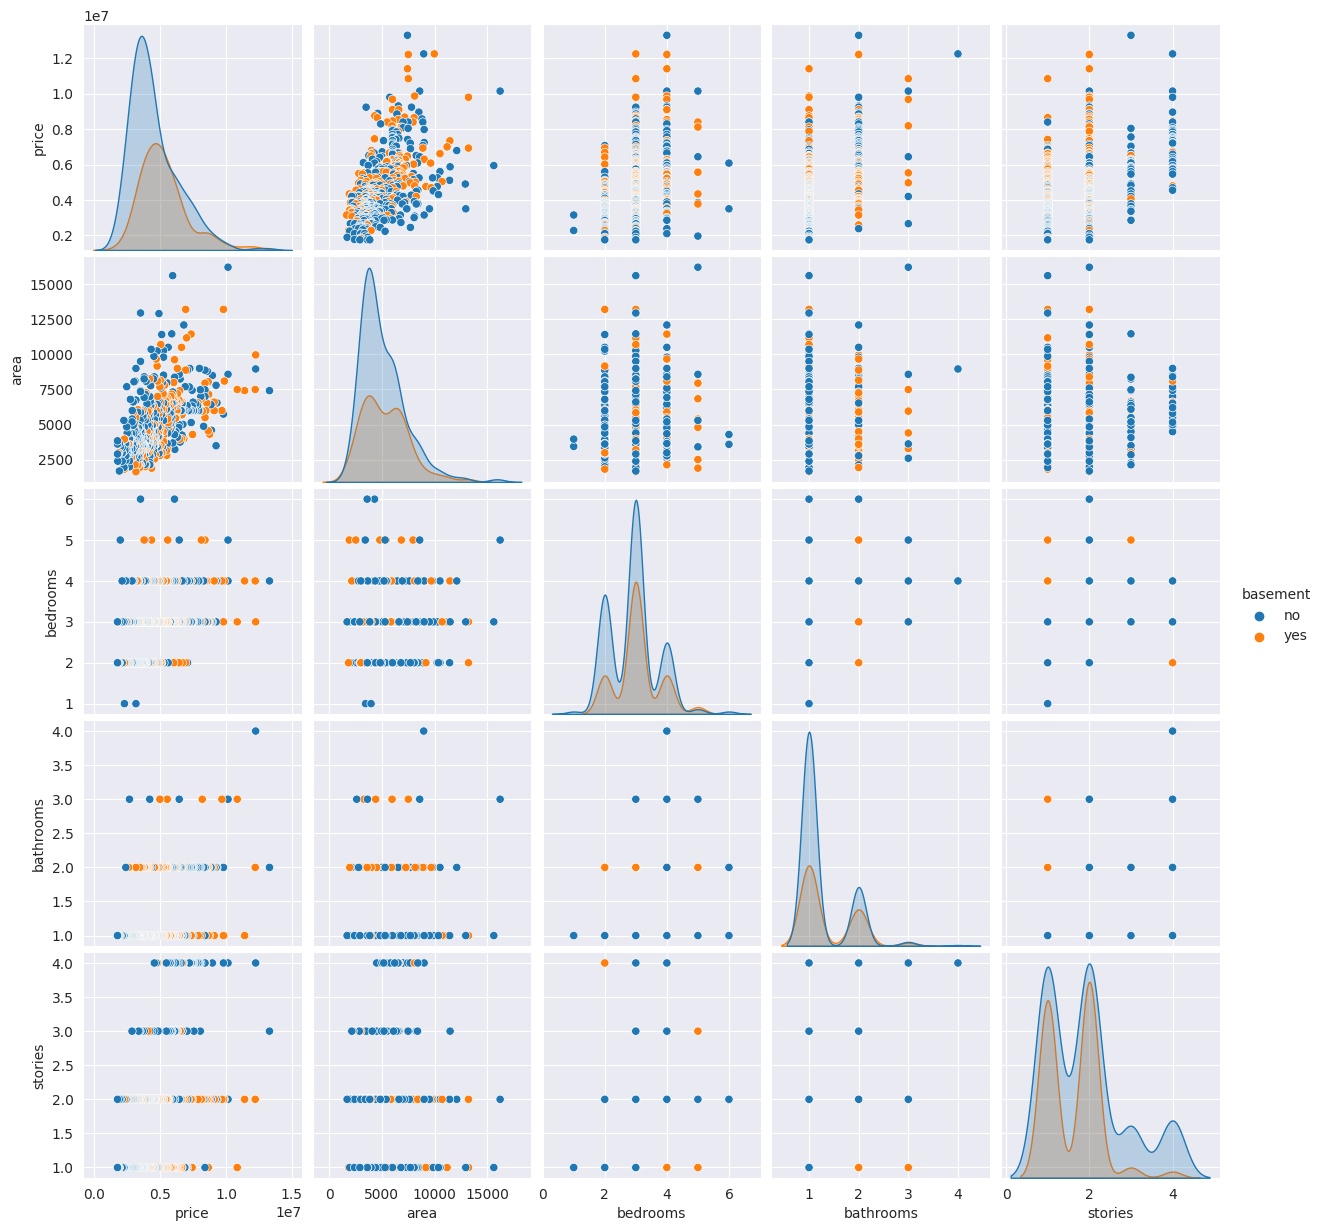

In [16]:
sns.set_style('darkgrid')
sns.pairplot(
             df,
             vars=['price', 'area', 'bedrooms', 'bathrooms', 'stories'],
             hue='basement'
             )
plt.show()

In [17]:
df_corr = df[['area', 'price']].corr()

<Axes: xlabel='area'>

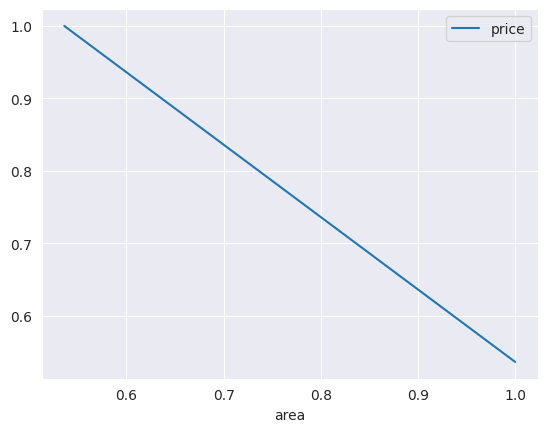

In [18]:
df_corr.plot('area', 'price')

# знайдіть ці ж параметри за допомогою аналітичного рішення

# порівняйте отримані результати